# Computer Vision Homework 1
## NetId: zc1213

### import packages

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.image as mpimg
import cv2
from scipy import misc
import numpy as np
from pylab import *
InteractiveShell.ast_node_interactivity = "all"
plt.ion()

### defines some functions, including histogram, pdf, cdf calculating and equalization, matching, etc.

In [248]:
def setPrintAll():
    InteractiveShell.ast_node_interactivity = "all"
def setPrintLast():
    InteractiveShell.ast_node_interactivity = "last"
    
    
def displayImage(curImage):
    hist,_=calcHist(curImage)
    pdf=calcPdf(hist)
    cdf=calcCdf(pdf)
    
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    plt.subplot(221)
    plt.imshow(curImage,cmap='gray')

    plt.subplot(222)
    plt.grid(True)
    plt.title('Histogram of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('number of pixels')
    plt.bar(range(len(hist)), hist,width=0.8)

    plt.subplot(223)
    plt.grid(True)
    plt.title('PDF of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('Probability density function')
    plt.plot(pdf)

    plt.subplot(224)
    plt.grid(True)
    plt.title('CDF of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('Cumulative distribution function')
    plt.plot(cdf)

    plt.tight_layout()
    
def rgb2gray(rgb):
    if len(rgb.shape)<=2:
        return rgb
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def calcHist(raw): 
    hist=np.zeros(256)
    unique, counts = np.unique(raw.astype(int), return_counts=True)
    for i,rank in enumerate(unique):
        hist[int(rank)]=counts[i]

    return hist,unique[0]

def calcPdf(hist):
    return hist/np.sum(hist)

def calcCdf(pdf):
    return np.array([np.sum(pdf[:i]) for i in range(1,257)])

def histEqualize(curImage):
    hist,Hmin=calcHist(curImage)
    pdf=calcPdf(hist)
    cdf=calcCdf(pdf)
    
    eq=255*(cdf[curImage.astype(int)]-1)/(1-pdf[Hmin])+255
    return eq

def histMatch(raw,target):
    g_img=rgb2gray(target)
    b_img=rgb2gray(raw)

    g_hist,g_hmin=calcHist(g_img)
    g_pdf=calcPdf(g_hist)
    g_cdf=calcCdf(g_pdf)

    b_hist,b_hmin=calcHist(b_img)
    b_pdf=calcPdf(b_hist)
    b_cdf=calcCdf(b_pdf)


    g_table=255*(g_cdf[np.arange(0,256,1)]-1)/(1-g_pdf[g_hmin])+255
    g_table=g_table.astype(int)
    inv_table=np.zeros(256)
    for i in range(256):
        curInd=np.where(g_table==i)[0]
        if len(curInd)==0:
            inv_table[i]=last
        else:
            inv_table[i]=curInd[-1]
            last=inv_table[i]
            
    eq_b_img=equalize(b_img)
    matched_b_img=inv_table[eq_b_img.astype(int)]
    
    return matched_b_img

### read images

In [245]:
image_chang=misc.imread('./chang.png')
image_checker128=misc.imread('./checker128-var20.png')
image_checker196=misc.imread('./checker196-var20.png')
image_ctscan=misc.imread('./CTscan.jpg')
image_crowd=misc.imread('./crowd.png')
image_lenna=misc.imread('./lenna.jpg')
imgList=[image_chang,image_checker128,image_checker196,image_ctscan,image_crowd]

### B2 Histogram Equalization

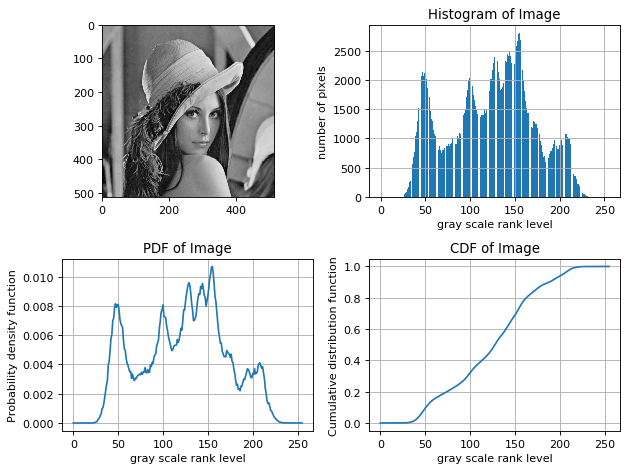

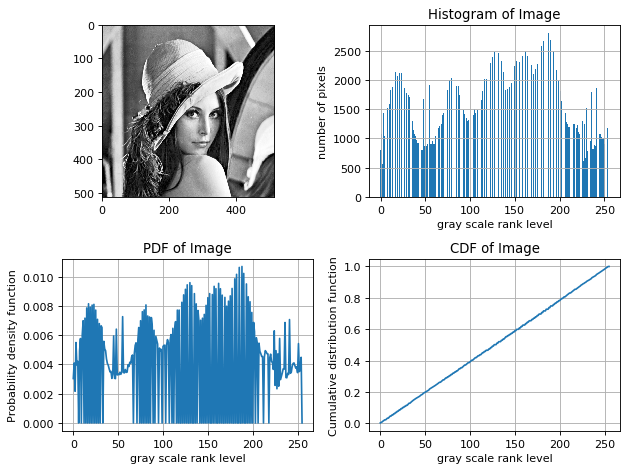

In [249]:
img=rgb2gray(image_lenna)
eq_img=histEqualize(img)
displayImage(img)
displayImage(eq_img)

### B3 Histogram Matching

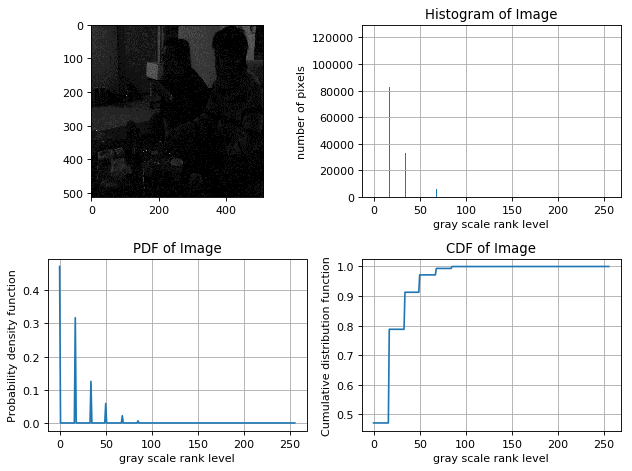

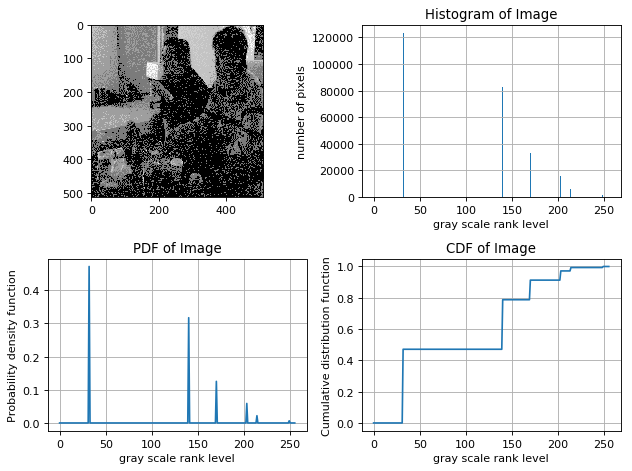

In [247]:
r=rgb2gray(image_chang)
t=rgb2gray(image_lenna)
matched_r=histMatch(raw=r,target=t)
displayImage(r)
displayImage(matched_r)